# Seaborn Toolbox

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
diamonds = sns.load_dataset('diamonds')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

## Histogram

<AxesSubplot:xlabel='price', ylabel='Count'>

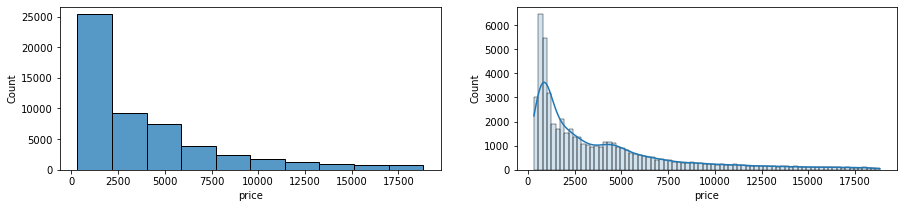

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharey=False)

sns.histplot(ax=axes[0], data = diamonds, x = 'price', bins = 10)
sns.histplot(ax=axes[1], data = diamonds, x = 'price', kde = True, alpha=0.2)

## KDE plot

<AxesSubplot:xlabel='price', ylabel='Density'>

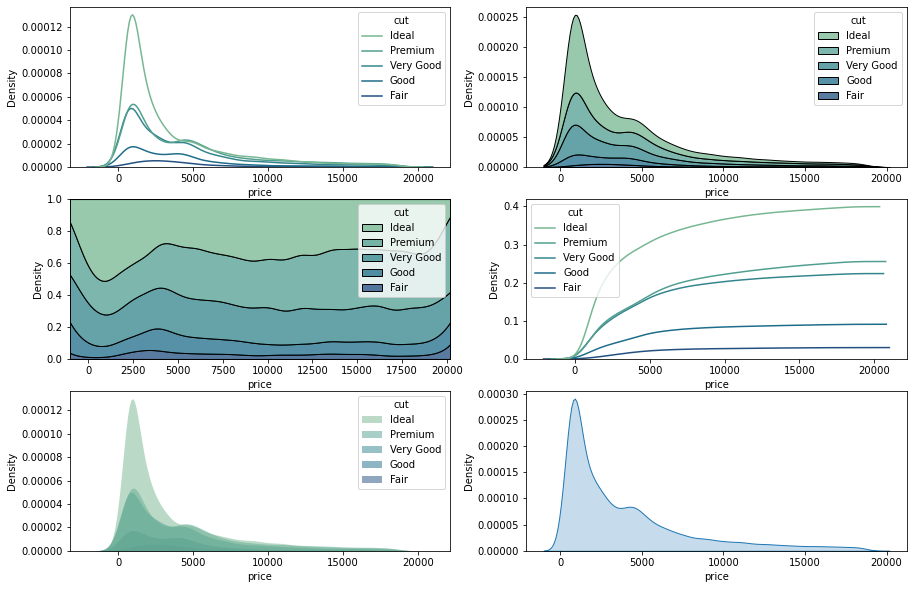

In [5]:
fig, axes = plt.subplots(3,2, figsize=(15, 10), sharey=False)

sns.kdeplot(ax=axes[0,0], data = diamonds, x ='price', hue = 'cut', palette = "crest")
sns.kdeplot(ax=axes[0,1], data = diamonds, x ='price', hue = 'cut',multiple="stack", palette = "crest")
sns.kdeplot(ax=axes[1,0], data = diamonds, x ='price', hue = 'cut',multiple="fill", palette = "crest")
sns.kdeplot(ax=axes[1,1], data = diamonds, x ='price', hue = 'cut',cumulative=True, palette = "crest")
sns.kdeplot(ax=axes[2,0], data = diamonds, x ='price', hue = 'cut',fill=True,palette="crest", alpha=.5, linewidth=0)
sns.kdeplot(ax=axes[2,1], data = diamonds, x ='price',  palette = "crest", fill = True)

## Rug plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

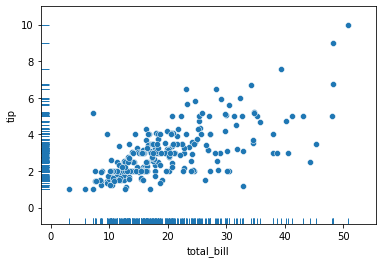

In [6]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip")

## ECDF plot

<AxesSubplot:xlabel='sepal_length', ylabel='Proportion'>

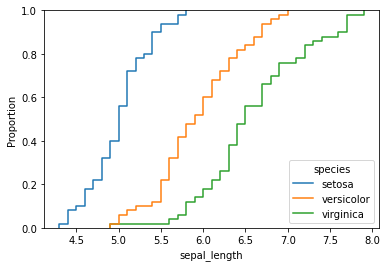

In [7]:
sns.ecdfplot(data = iris, x = 'sepal_length', hue = 'species')

## Joint plot

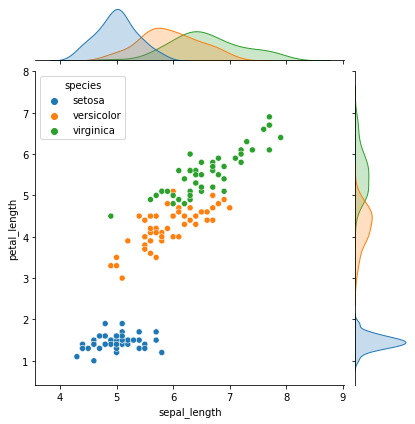

In [8]:
sns.jointplot(data = iris, x ='sepal_length', y = 'petal_length', hue = 'species')

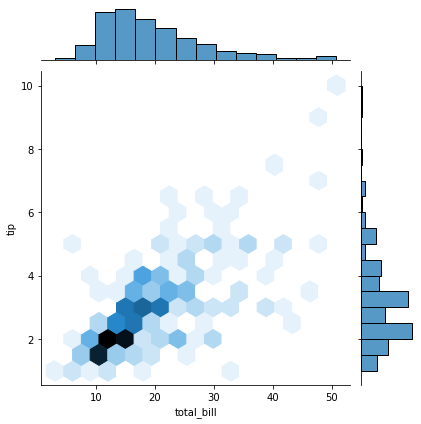

In [9]:
sns.jointplot(data = tips, x ='total_bill', y = 'tip', kind = 'hex')


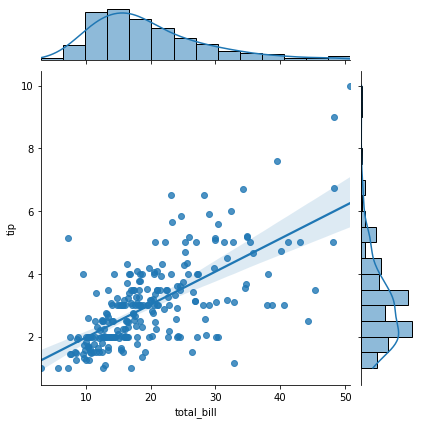

In [10]:
sns.jointplot(data = tips, x ='total_bill', y = 'tip', kind = 'reg')


## Pairplot

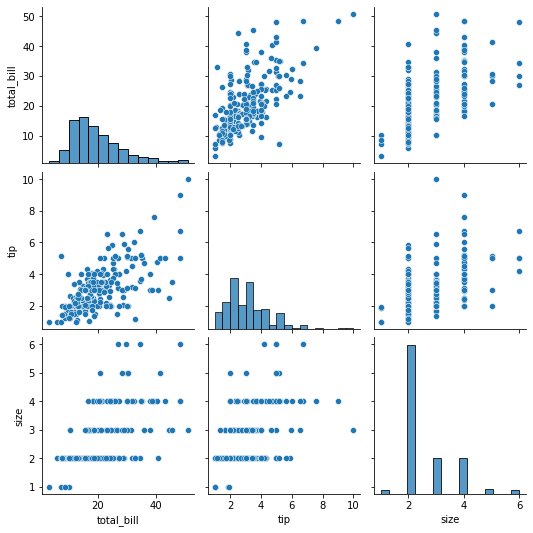

In [11]:
sns.pairplot(tips)

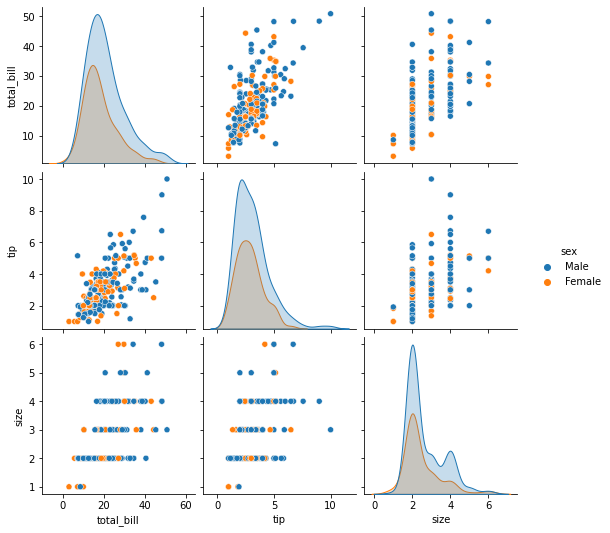

In [12]:
sns.pairplot(tips, hue = 'sex')

## Barplot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

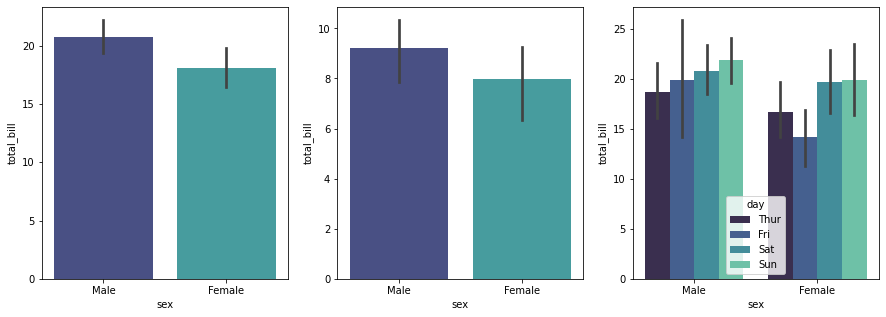

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=False)

sns.barplot(ax = axes[0], x = 'sex' , y = 'total_bill', data = tips, palette='mako')  # default: mean
sns.barplot(ax = axes[1], x = 'sex' , y = 'total_bill', data = tips, estimator = np.std, palette='mako')
sns.barplot(ax = axes[2], x = 'sex' , y = 'total_bill', hue = 'day', data = tips, palette='mako')

## Countplot

<AxesSubplot:xlabel='cut', ylabel='count'>

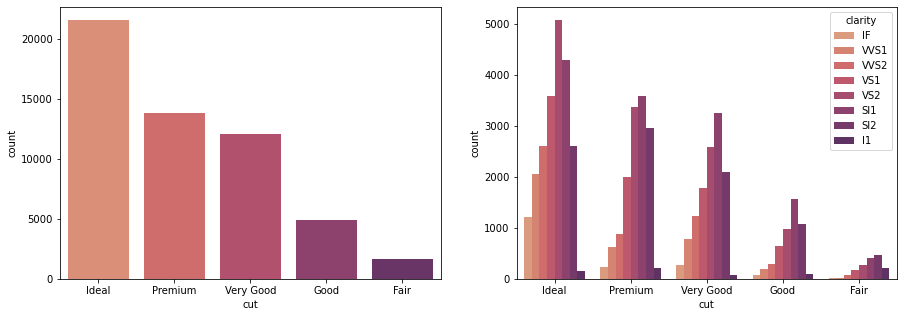

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=False)

sns.countplot(ax = axes[0], x = 'cut' , data = diamonds, palette = 'flare')
sns.countplot(ax = axes[1], x = 'cut' , data = diamonds, palette = 'flare', hue = 'clarity')


## Boxplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

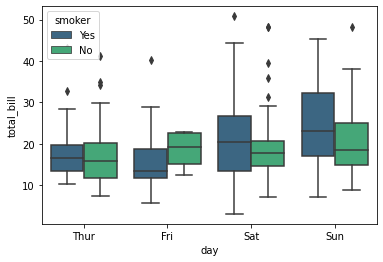

In [15]:
sns.boxplot(x = 'day', y = 'total_bill',data = tips, hue = 'smoker', palette = 'viridis')

## Boxenplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

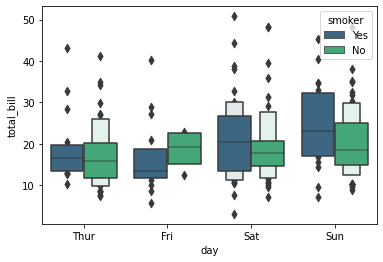

In [16]:
sns.boxenplot(x = 'day', y = 'total_bill',data = tips, hue = 'smoker', palette = 'viridis')

## Violin

<AxesSubplot:xlabel='day', ylabel='total_bill'>

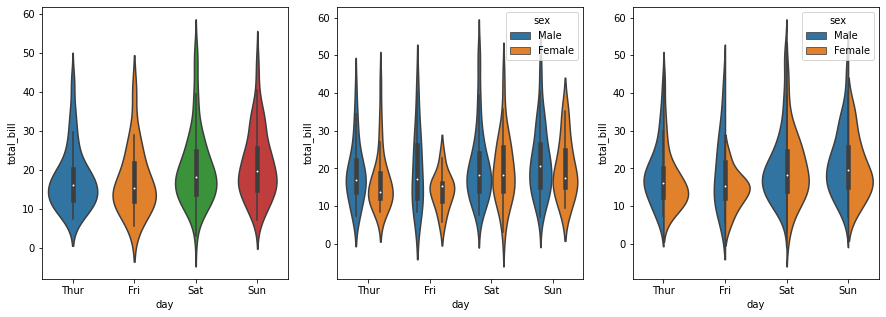

In [17]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=False)


sns.violinplot(ax = axes[0], x = 'day', y = 'total_bill',data = tips)
sns.violinplot(ax = axes[1], x = 'day', y = 'total_bill',data = tips, hue = 'sex')
sns.violinplot(ax = axes[2], x = 'day', y = 'total_bill',data = tips, hue = 'sex', split = True)


## Stripplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

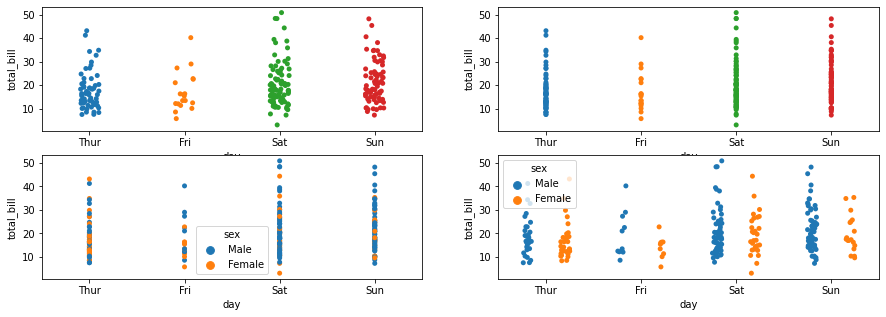

In [18]:
fig, axes = plt.subplots(2,2, figsize=(15, 5), sharey=False)

sns.stripplot(ax = axes[0,0], x='day', y='total_bill', data = tips)
sns.stripplot(ax = axes[0,1], x='day', y='total_bill', data = tips, jitter = False)
sns.stripplot(ax = axes[1,0], x='day', y='total_bill', data = tips, jitter = False, hue = 'sex')
sns.stripplot(ax = axes[1,1], x='day', y='total_bill', data = tips, jitter = True, hue = 'sex', dodge = True)


## Swarmplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

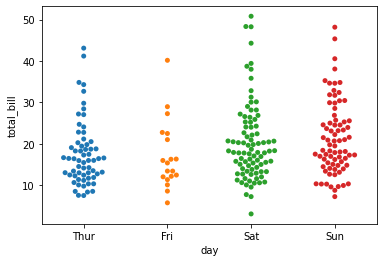

In [19]:
sns.swarmplot(x='day', y='total_bill', data = tips)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

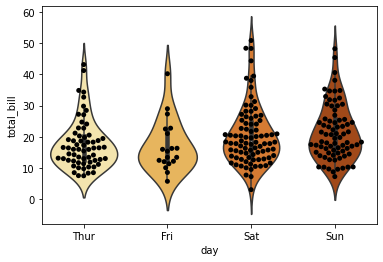

In [20]:
sns.violinplot(x = 'day', y = 'total_bill',data = tips, palette = 'YlOrBr')
sns.swarmplot(x='day', y='total_bill', data = tips, color = 'black')


## Heatmap

<AxesSubplot:>

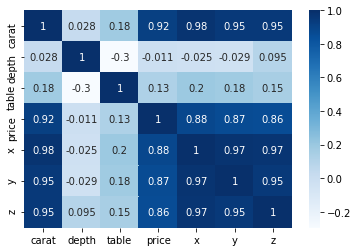

In [21]:
dc = diamonds.corr()
sns.heatmap(dc,annot = True,cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

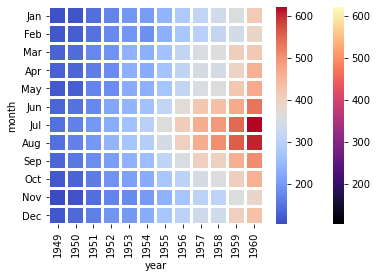

In [22]:
flights.head()
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
sns.heatmap(fp, cmap = 'magma')
sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white', linewidths = 2)


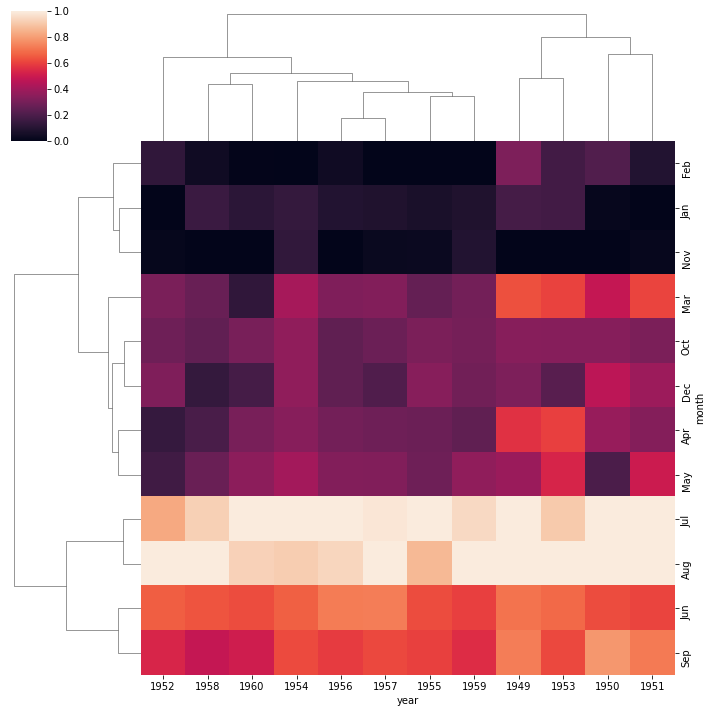

In [23]:
sns.clustermap(fp, standard_scale = 1)


## GRIDS

### Pair Grid

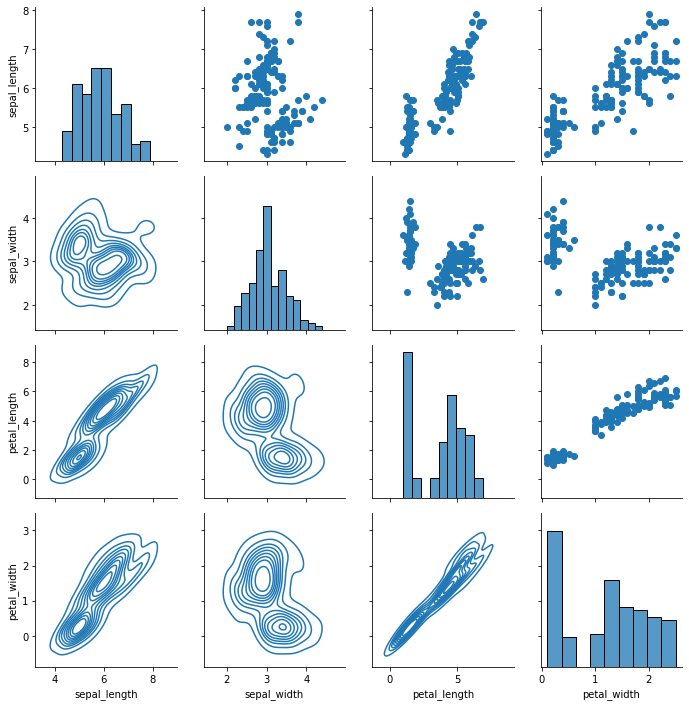

In [24]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


### Facet Grid

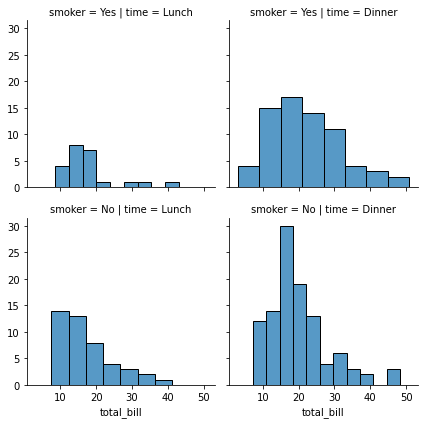

In [25]:
g = sns.FacetGrid(data = tips, col ='time' , row= 'smoker')
g.map(sns.histplot, 'total_bill')

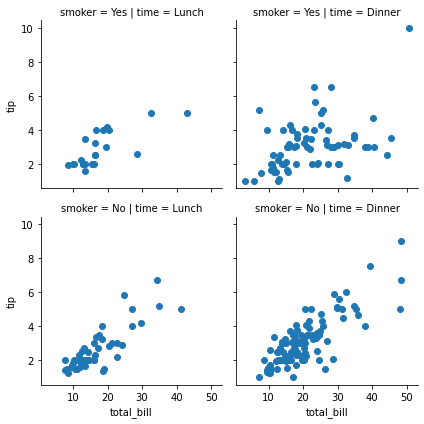

In [26]:
g = sns.FacetGrid(data = tips, col ='time' , row= 'smoker')
g.map(plt.scatter, 'total_bill','tip')


### Catplot

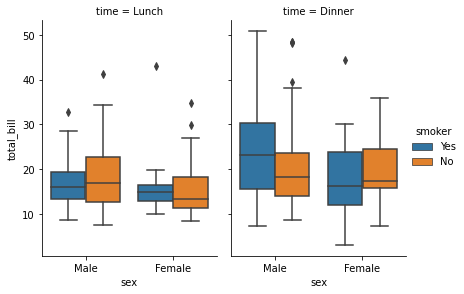

In [27]:
g = sns.catplot(x="sex", y="total_bill",hue="smoker", col="time", data=tips, kind="box", height=4, aspect=.7)

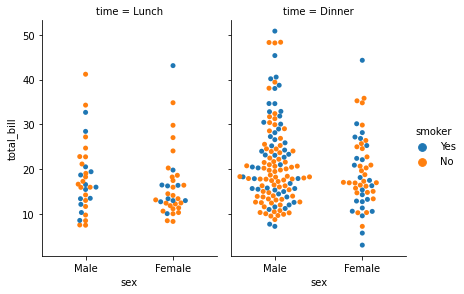

In [28]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="swarm",
                height=4, aspect=.7)

## Regression plots

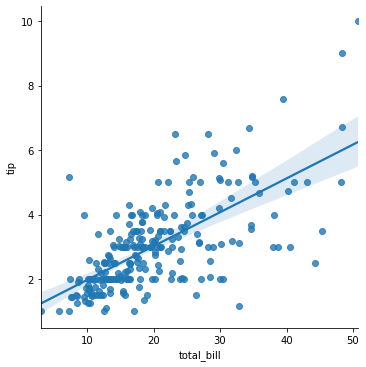

In [29]:
sns.lmplot(x='total_bill', y='tip', data = tips)


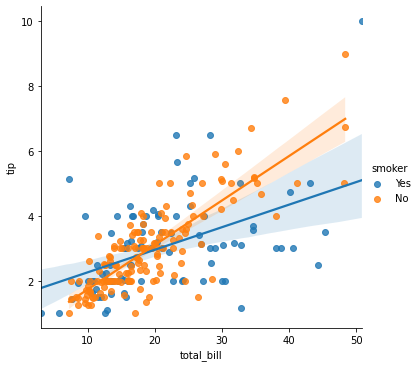

In [30]:
sns.lmplot(x='total_bill', y='tip', data = tips, hue = 'smoker')


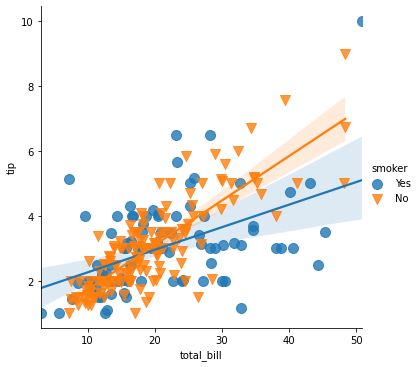

In [31]:
sns.lmplot(x='total_bill', y='tip', data = tips, hue = 'smoker', markers = ['o','v'], scatter_kws = {'s':100})

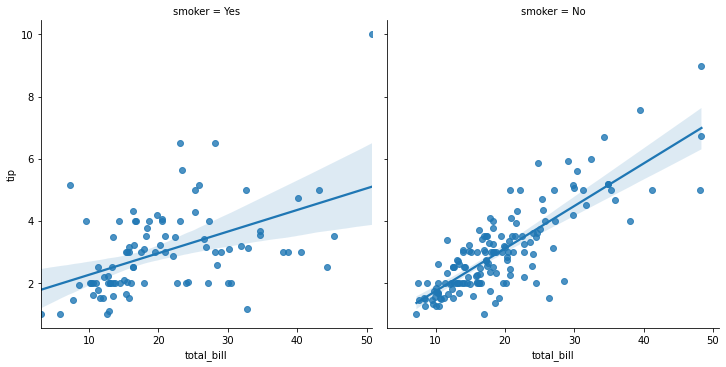

In [32]:
sns.lmplot(x='total_bill', y='tip', data = tips, col = 'smoker')

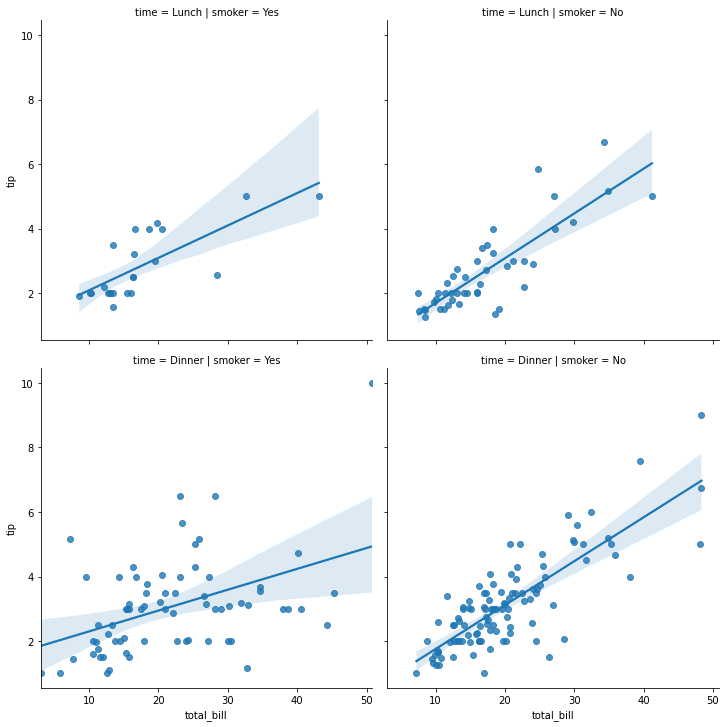

In [33]:
sns.lmplot(x='total_bill', y='tip', data = tips, col = 'smoker', row = 'time')

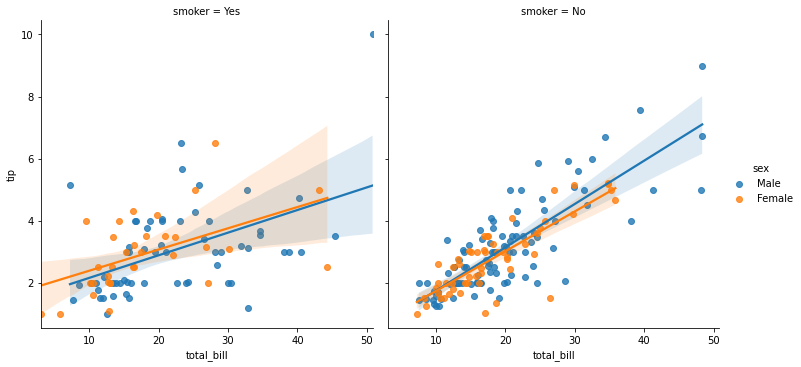

In [34]:
sns.lmplot(x='total_bill', y='tip', data = tips, col = 'smoker',  hue = 'sex')

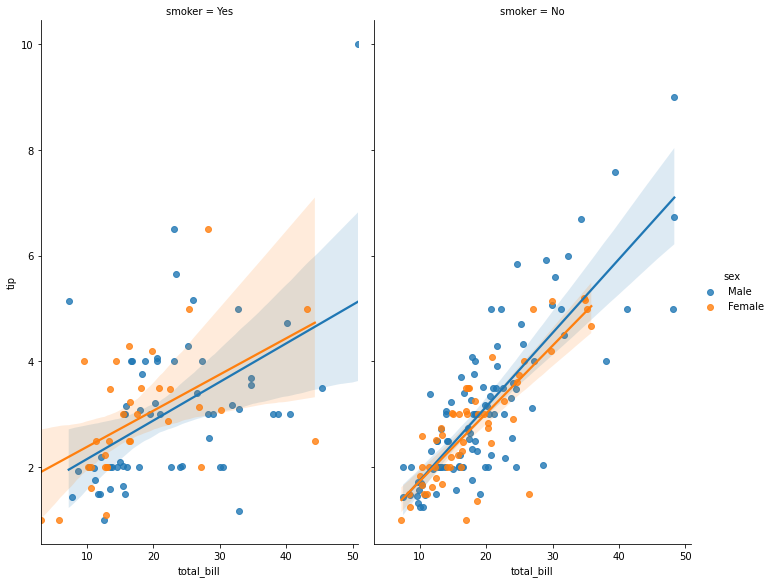

In [35]:
sns.lmplot(x='total_bill', y='tip', data = tips, col = 'smoker',  hue = 'sex', aspect=0.6, height=8)

## Style

<AxesSubplot:xlabel='sex', ylabel='count'>

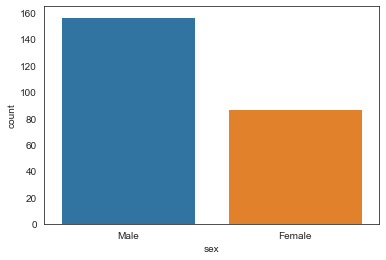

In [36]:
sns.set_style('white')
sns.countplot( x='sex', data = tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

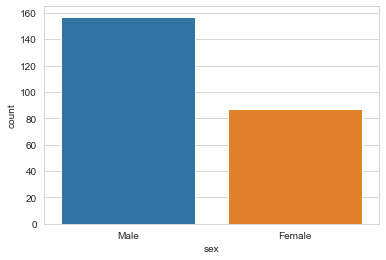

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data = tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

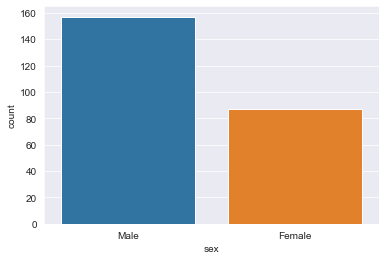

In [38]:
sns.set_style('darkgrid')
sns.countplot(x='sex', data = tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

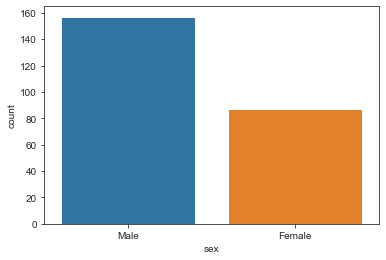

In [39]:
sns.set_style('ticks')
sns.countplot(x='sex', data = tips)

## Despine

<AxesSubplot:xlabel='sex', ylabel='count'>

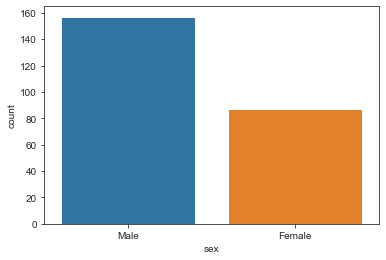

In [40]:
sns.countplot(x='sex', data = tips)
#sns.despine()

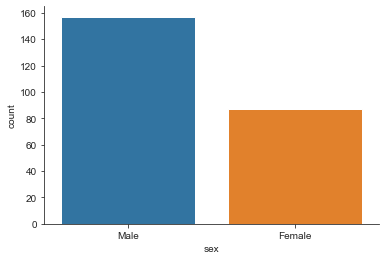

In [41]:
sns.countplot(x='sex', data = tips)
sns.despine()

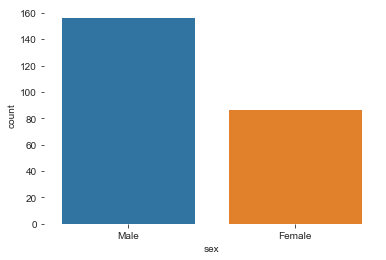

In [42]:
sns.countplot(x='sex', data = tips)
sns.despine(left = True, bottom = True)


## Figsize

<AxesSubplot:xlabel='day', ylabel='total_bill'>

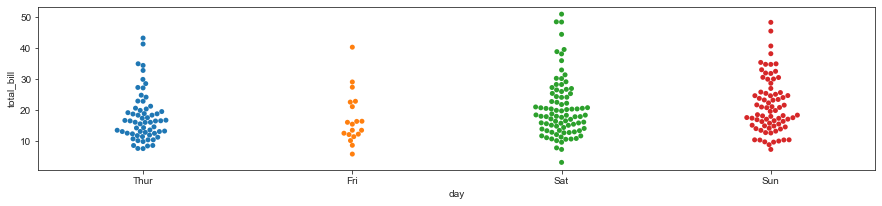

In [43]:
plt.figure(figsize=(15,3))
sns.swarmplot(x='day', y='total_bill', data = tips)

## Context

<AxesSubplot:xlabel='day', ylabel='total_bill'>

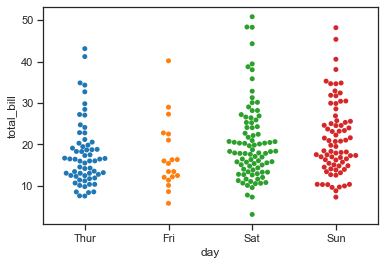

In [44]:
sns.set_context('notebook', font_scale = 1) # notebook, paper, talk, poster
sns.swarmplot(x='day', y='total_bill', data = tips)

## Palettes

In [45]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [46]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [47]:
sns.color_palette("seismic")

[(0.0, 0.0, 0.6952941176470588),
 (0.1450980392156863, 0.1450980392156863, 1.0),
 (0.7098039215686275, 0.7098039215686275, 1.0),
 (1.0, 0.7098039215686274, 0.7098039215686274),
 (1.0, 0.14509803921568631, 0.14509803921568631),
 (0.7823529411764706, 0.0, 0.0)]

In [48]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [49]:
sns.color_palette("viridis")

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [50]:
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [51]:
sns.color_palette("crest")

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

In [52]:
sns.color_palette("icefire")

[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

In [53]:
sns.color_palette("Spectral")

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [54]:
sns.color_palette("coolwarm")

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

In [55]:
sns.color_palette("YlOrBr")

[(0.9994925028835063, 0.9584775086505191, 0.7154325259515572),
 (0.996078431372549, 0.8549173394848135, 0.493517877739331),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645904),
 (0.6258823529411764, 0.21610149942329873, 0.01467128027681661)]

In [56]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [57]:
sns.color_palette("hls", 20)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5272, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.86, 0.8392000000000002, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.42320000000000013),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7352000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6727999999999997, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.33999999999999997, 0.36079999999999973, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7767999999999993),
 (0.86, 0.33999999999999997, 0.6207999999999999),
 (0.86, 0.33999999999999997, 0.46479999999999977)]

In [58]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [59]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [60]:
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]